In [172]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from scipy.optimize import curve_fit
from scipy import stats
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score



In [224]:
#Loading the data

#Please ensure the files 'diabetic_data.csv' and 'icd_codes.csv' are in the same file
rawData = 'diabetic_data.csv'
rawData2 = 'icd_codes.csv'
icdCodes = pd.read_csv(rawData2)
df = pd.read_csv(rawData)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**1.1: Data cleaning and transformation**

In [174]:
#Shows the shape of the dataset
df.shape

(101766, 50)

In [175]:
#replacing the missing values with numpy.NaN
df_2 = df.replace('?', np.NaN)
df_2

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [176]:
#Dropping all coloumns with more than 50% NaN values
emptyy = pd.DataFrame(df_2, columns = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'])

percentage = 50
min_count =  int(((100-percentage)/100)*emptyy.shape[0] + 1)
df_3 = emptyy.dropna( axis=1, thresh=min_count)

df_3

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [177]:
#Drop columns with more than 95% repeated values
columns = []
percentage_to_drop = 0.95 #define the percentage criterion for drop
for cols in df_3.columns:
    counter = df_3[cols].value_counts().reset_index()
    counter['drop_percentage'] = counter[cols]/df_3.shape[0]
    counter['drop_criterion']  = counter['drop_percentage'] > percentage_to_drop
    if True in counter.drop_criterion.values:
        columns.append(cols)
df_4 = df_3.drop(columns= columns,axis=1)
df_4

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [178]:
#Transforming age to be the middle value
df_5 = df_4
df_5['age'] = df_5.age.str.extract('(\d+)-(\d+)').astype('int').mean(axis=1).astype('int').round(0)

df_5

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [179]:
#Replace missing values in diag_1, diag_2, and diag_3 to 0
df_5['diag_1'].fillna(0,inplace=True)
df_5['diag_2'].fillna(0,inplace=True)
df_5['diag_3'].fillna(0,inplace=True)

df_5

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,...,Steady,No,No,No,No,No,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,...,No,No,Steady,No,Steady,No,Up,Ch,Yes,NO


In [180]:
#Drop all rows with missing values
df_6 = df_5.dropna()
df_6


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,NO
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,Caucasian,Male,75,2,6,7,6,MC,...,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,443793668,47293812,Caucasian,Male,85,1,13,7,3,MC,...,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,443804570,33230016,Caucasian,Female,75,1,22,7,8,MC,...,No,No,No,No,No,No,Steady,No,Yes,>30
101749,443816024,106392411,Caucasian,Female,75,3,6,1,3,MC,...,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [181]:
#Shows columns that are ints and objects
df_6.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int32
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glimepiride                 object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone       

In [182]:
#Dataframe of numerical features
df_7 = df_6.select_dtypes(include= [np.number])
df_7


,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
20446,72091308,20123568,75,1,22,7,7,58,2,15,0,0,0,9
20737,72848634,20377854,65,2,1,1,3,59,3,11,0,0,0,6
20824,73062156,20408121,95,1,1,7,4,56,1,9,0,0,0,6
21083,73731852,20542797,75,1,2,7,10,68,1,18,0,0,0,6
23879,81355914,7239654,75,1,3,6,12,77,5,19,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,443739044,106595208,75,2,6,7,6,46,5,14,0,0,1,9
101743,443793668,47293812,85,1,13,7,3,45,0,26,1,0,1,9
101747,443804570,33230016,75,1,22,7,8,51,6,19,0,0,0,9
101749,443816024,106392411,75,3,6,1,3,27,1,29,0,1,0,9


In [183]:
#List of columns with numerical features
numList = [col for col in df_7.columns]
numList

['encounter_id',
 'patient_nbr',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [184]:
#Dataframe of categorical features
df_8 = df_6.select_dtypes(include= [np.object])
df_8

,race,gender,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,Caucasian,Female,MC,Orthopedics-Reconstructive,821,276,285,None,None,No,No,No,No,Up,No,Steady,Ch,Yes,NO
20737,Caucasian,Female,MC,Nephrology,V56,403,599,None,None,No,No,No,No,No,No,Steady,No,Yes,NO
20824,Caucasian,Female,MC,Emergency/Trauma,532,428,535,None,None,No,Steady,No,No,No,No,No,No,Yes,NO
21083,Caucasian,Male,MC,InternalMedicine,682,427,276,None,None,Steady,No,No,No,No,No,Steady,Ch,Yes,NO
23879,Caucasian,Female,UN,InternalMedicine,238,250.02,733,None,>8,No,No,No,No,No,No,Steady,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101735,Caucasian,Male,MC,Emergency/Trauma,575,577,250,None,Norm,No,No,No,No,No,No,Up,Ch,Yes,NO
101743,Caucasian,Male,MC,Emergency/Trauma,486,276,428,None,None,No,No,No,Up,No,Steady,Down,Ch,Yes,NO
101747,Caucasian,Female,MC,InternalMedicine,410,311,250,None,>7,No,No,No,No,No,No,Steady,No,Yes,>30
101749,Caucasian,Female,MC,Orthopedics,715,401,250,None,Norm,Steady,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [185]:
#List of columns with categorical features
catList = [col for col in df_8.columns]
catList

['race',
 'gender',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [186]:
#Identify outliers in numerical columns and remove them
for col in df_6.select_dtypes(include= np.number):
    mean = np.mean(df_6[col])
    std = np.std(df_6[col])
    df_9 = df_6[(df_6[col] > mean-(3*std)) & (df_6[col] < mean+(3*std))]
df_9.shape

(27098, 33)

In [187]:
#Remove duplicates in the column patient_nbr
df_10 = df_9.drop_duplicates('patient_nbr')
df_10.shape

(19696, 33)

In [188]:
#Data exploration Hint 3
df_10["readmitted"].replace({"NO": 0, ">30": 1, "<30":1}, inplace=True)
df_10

C:\Users\sufya\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
20446,72091308,20123568,Caucasian,Female,75,1,22,7,7,MC,...,No,No,No,No,Up,No,Steady,Ch,Yes,0
20737,72848634,20377854,Caucasian,Female,65,2,1,1,3,MC,...,No,No,No,No,No,No,Steady,No,Yes,0
20824,73062156,20408121,Caucasian,Female,95,1,1,7,4,MC,...,No,Steady,No,No,No,No,No,No,Yes,0
21083,73731852,20542797,Caucasian,Male,75,1,2,7,10,MC,...,Steady,No,No,No,No,No,Steady,Ch,Yes,0
23879,81355914,7239654,Caucasian,Female,75,1,3,6,12,UN,...,No,No,No,No,No,No,Steady,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101688,443119916,34751961,Caucasian,Male,25,1,1,7,4,SP,...,No,No,No,No,No,No,Up,Ch,Yes,0
101710,443207210,30370995,Other,Female,35,2,1,7,3,MD,...,Steady,No,No,No,No,No,Steady,Ch,Yes,0
101716,443237558,93806559,Other,Male,75,2,3,7,8,SP,...,No,No,No,No,No,No,Down,Ch,Yes,0
101720,443266892,180189752,Caucasian,Male,55,2,1,7,5,BC,...,No,Up,No,No,Steady,No,Down,Ch,Yes,1


In [189]:
count1 = df_10[df_10['readmitted'] == 1] #All readmitted
count0 = df_10[df_10['readmitted'] == 0] #All NOT readmitted

**1.2: Data Exploration**

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

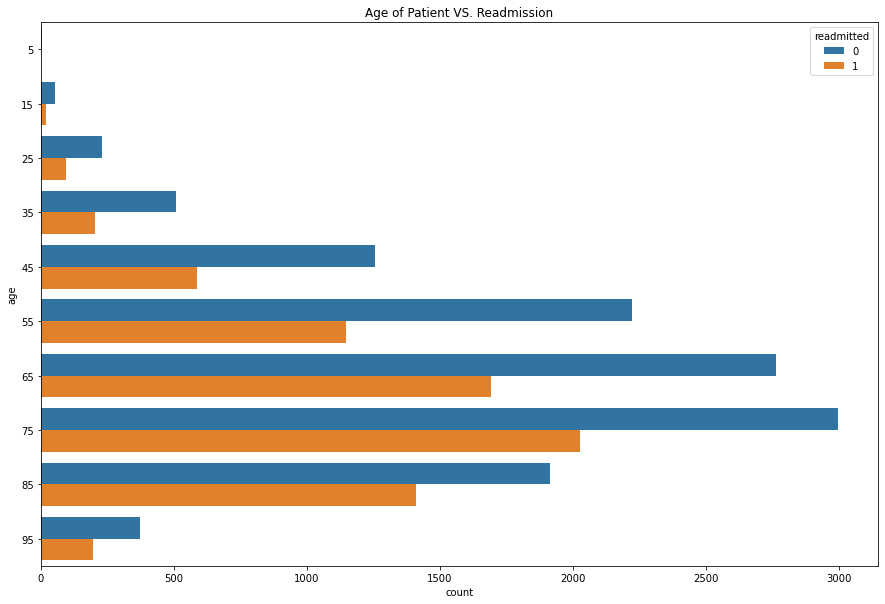

In [190]:
#Age impact on readmission rates
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df_10['age'], hue = df_10['readmitted']).set_title('Age of Patient VS. Readmission')

In [191]:
#Age impact on readmissions
count1 = df_10[df_10['readmitted'] == 1] #All readmitted
count0 = df_10[df_10['readmitted'] == 0] #All NOT readmitted
total = df_10.groupby('age')['readmitted'].count().reset_index() #Total readmitted

count1_race = count1.groupby('age')['readmitted'].count().reset_index()
count0_race = count0.groupby('age')['readmitted'].count().reset_index()

total['Has been Readmitted (%)'] = round((count1_race['readmitted'] / total['readmitted']) *100, 2)
total['Has not been Readmitted (%)'] = round((count0_race['readmitted'] / total['readmitted']) *100, 2)
total.drop('readmitted', axis=1, inplace=True)
total

,age,Has been Readmitted (%),Has not been Readmitted (%)
0,5,20.00,80.00
1,15,27.40,72.60
2,25,28.92,71.08
3,35,28.83,71.17
4,45,31.81,68.19
5,55,34.06,65.94
6,65,37.95,62.05
7,75,40.33,59.67
8,85,42.40,57.60
9,95,34.39,65.61


Text(0.5, 1.0, 'Race of Patient VS. Readmission')

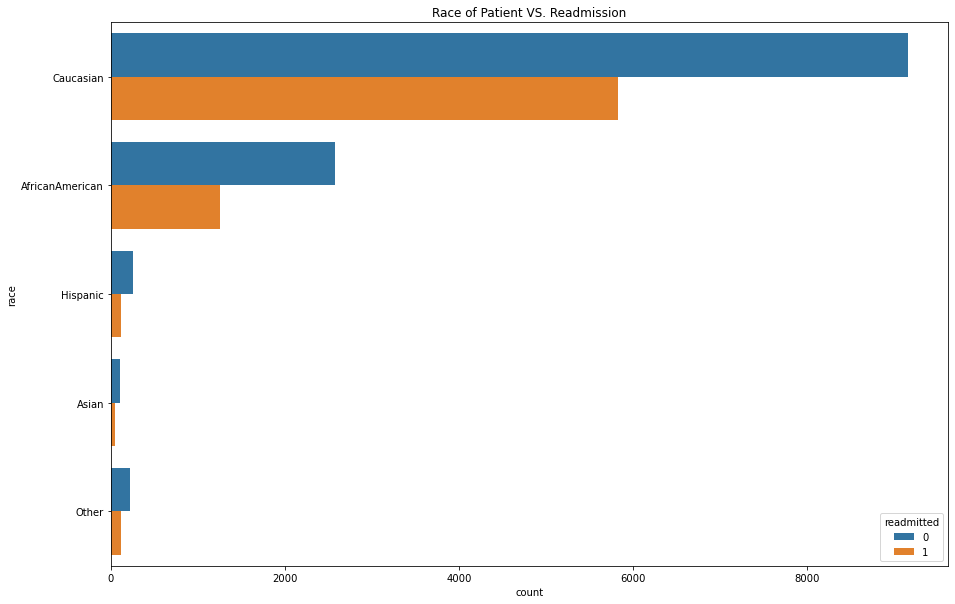

In [192]:
#Race impact on readmission rates
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df_10['race'], hue = df_10['readmitted']).set_title('Race of Patient VS. Readmission')

In [193]:
#Race impact on readmission rates
count1 = df_10[df_10['readmitted'] == 1] #All readmitted
count0 = df_10[df_10['readmitted'] == 0] #All NOT readmitted
total = df_10.groupby('race')['readmitted'].count().reset_index() #Total readmitted

count1_race = count1.groupby('race')['readmitted'].count().reset_index()
count0_race = count0.groupby('race')['readmitted'].count().reset_index()

total['Has been Readmitted (%)'] = round((count1_race['readmitted'] / total['readmitted']) *100, 2)
total['Has not been Readmitted (%)'] = round((count0_race['readmitted'] / total['readmitted']) *100, 2)
total.drop('readmitted', axis=1, inplace=True)
total

,race,Has been Readmitted (%),Has not been Readmitted (%)
0,AfricanAmerican,32.77,67.23
1,Asian,31.87,68.12
2,Caucasian,38.89,61.11
3,Hispanic,31.99,68.01
4,Other,35.01,64.99


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

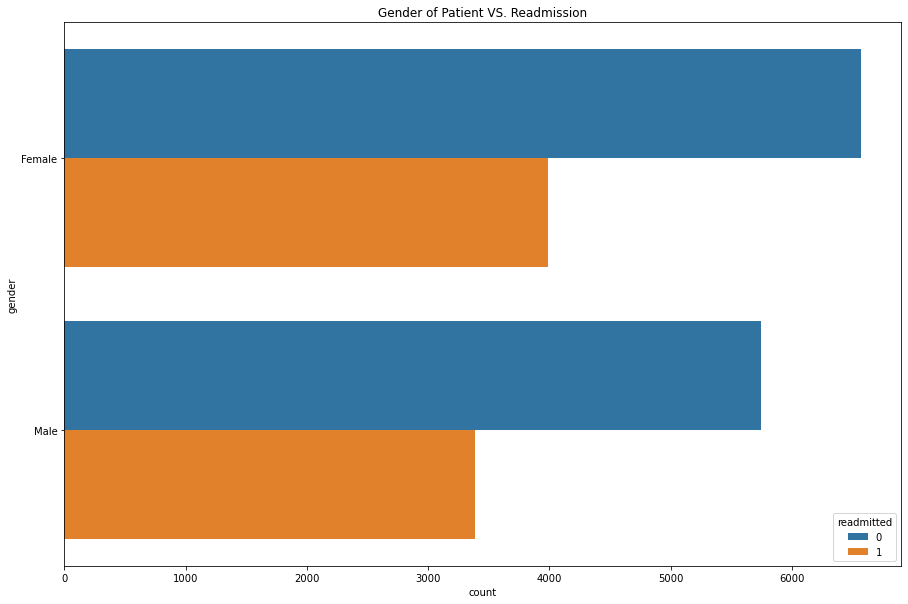

In [194]:
#Gender impact on readmission rates
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df_10['gender'], hue = df_10['readmitted']).set_title('Gender of Patient VS. Readmission')

In [195]:
#Gender impact on readmissions
count1 = df_10[df_10['readmitted'] == 1] #All readmitted
count0 = df_10[df_10['readmitted'] == 0] #All NOT readmitted
total = df_10.groupby('gender')['readmitted'].count().reset_index() #Total readmitted

count1_race = count1.groupby('gender')['readmitted'].count().reset_index()
count0_race = count0.groupby('gender')['readmitted'].count().reset_index()

total['Has been Readmitted (%)'] = round((count1_race['readmitted'] / total['readmitted']) *100, 2)
total['Has not been Readmitted (%)'] = round((count0_race['readmitted'] / total['readmitted']) *100, 2)
total.drop('readmitted', axis=1, inplace=True)
total

,gender,Has been Readmitted (%),Has not been Readmitted (%)
0,Female,37.75,62.25
1,Male,37.09,62.91


<ipython-input-196-55e596de8606>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


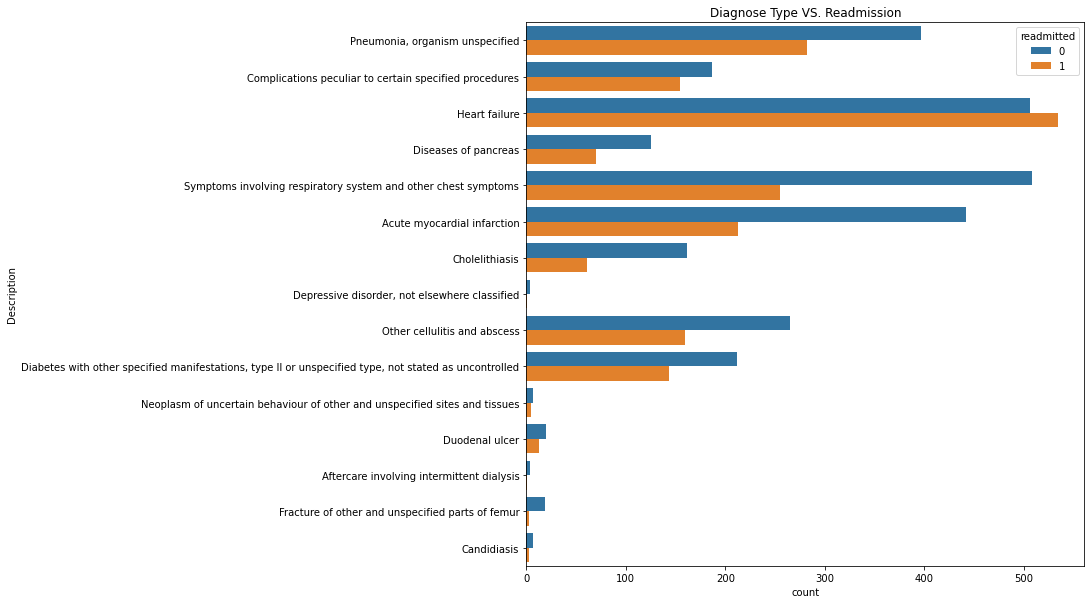

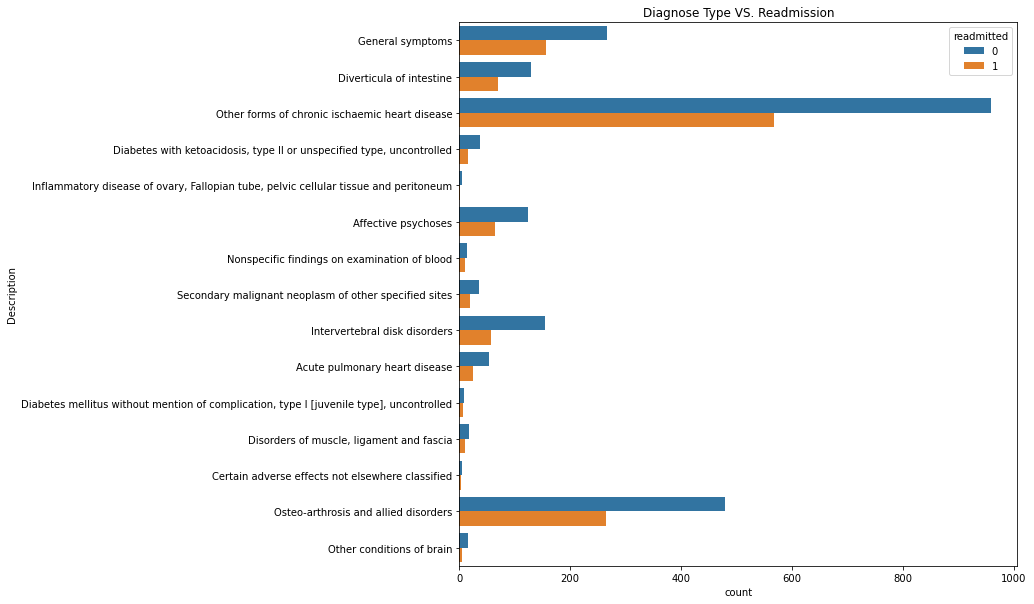

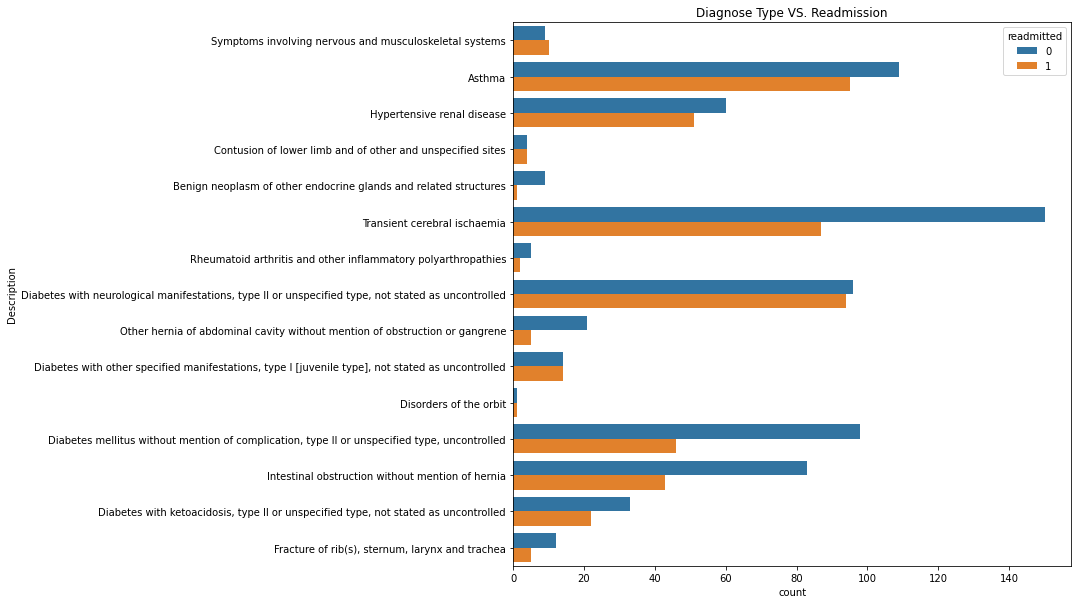

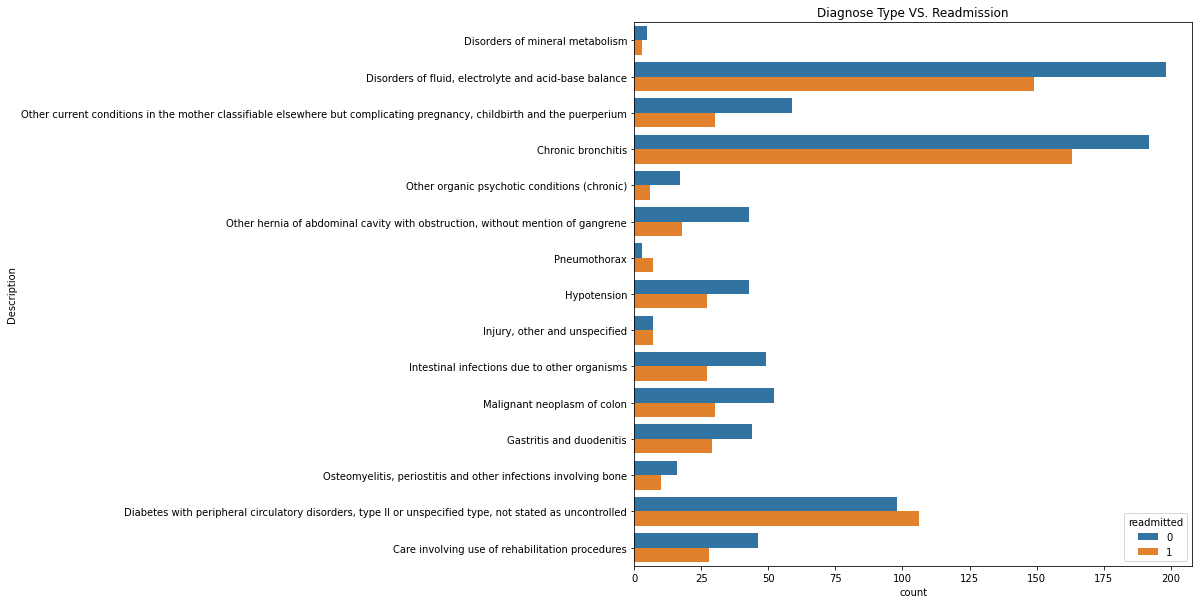

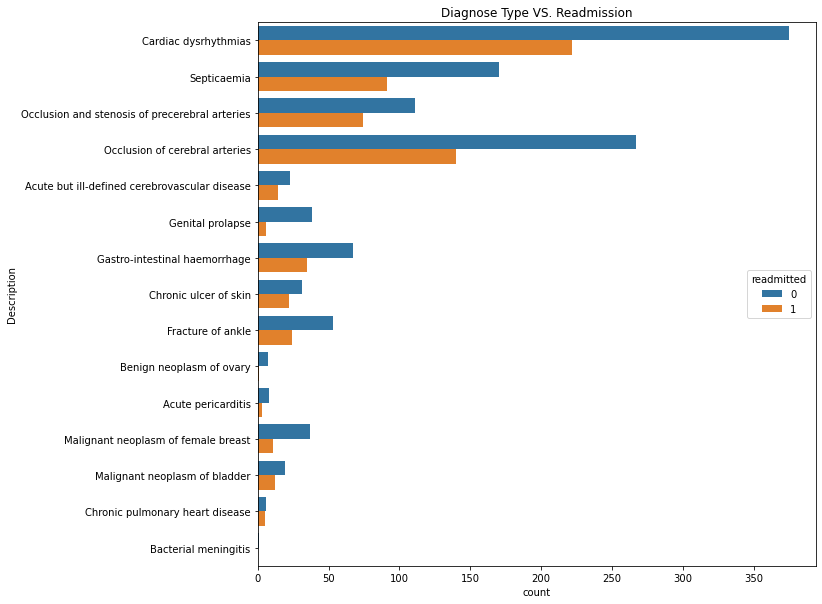

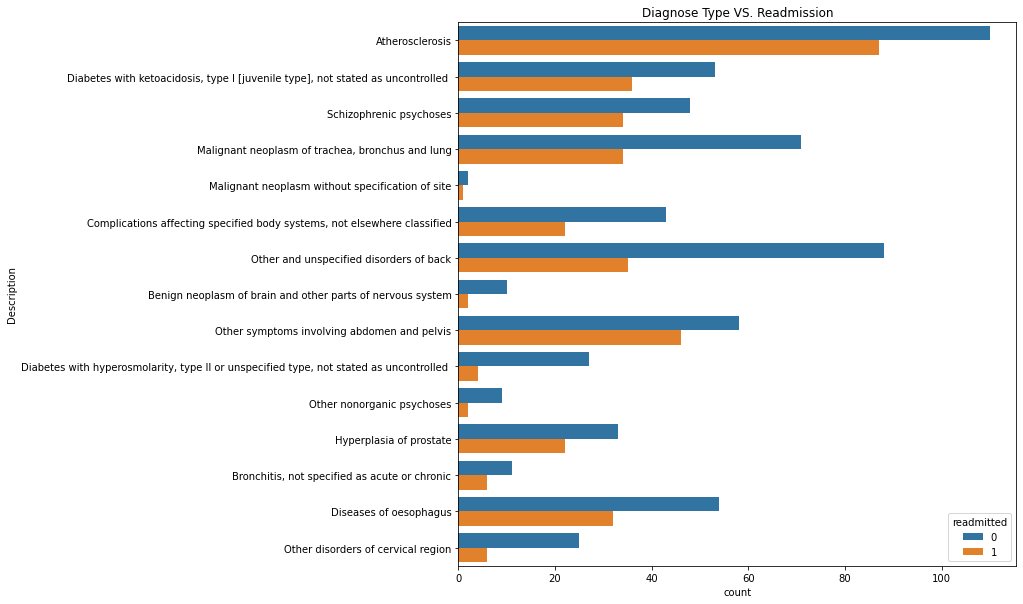

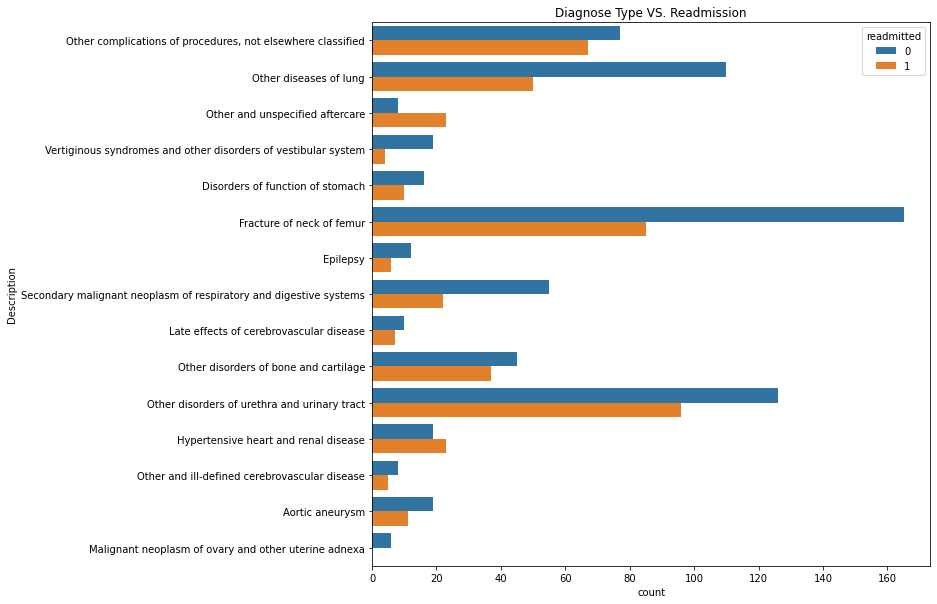

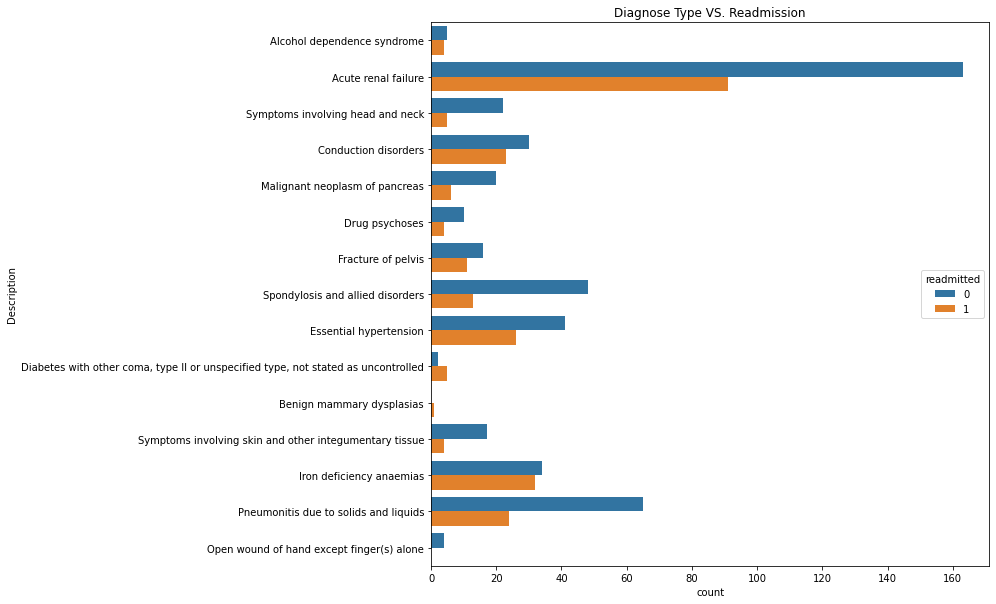

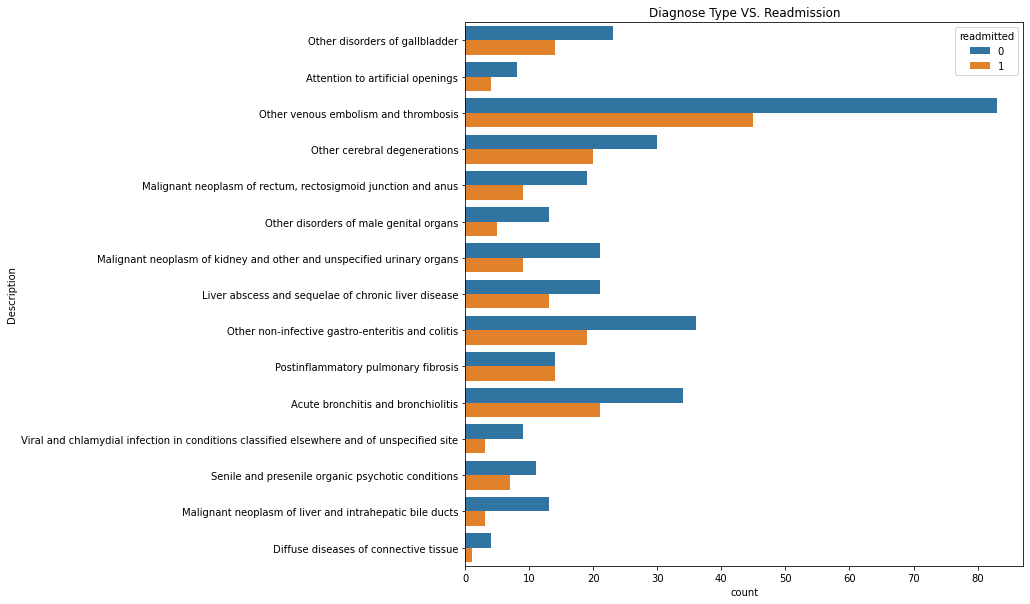

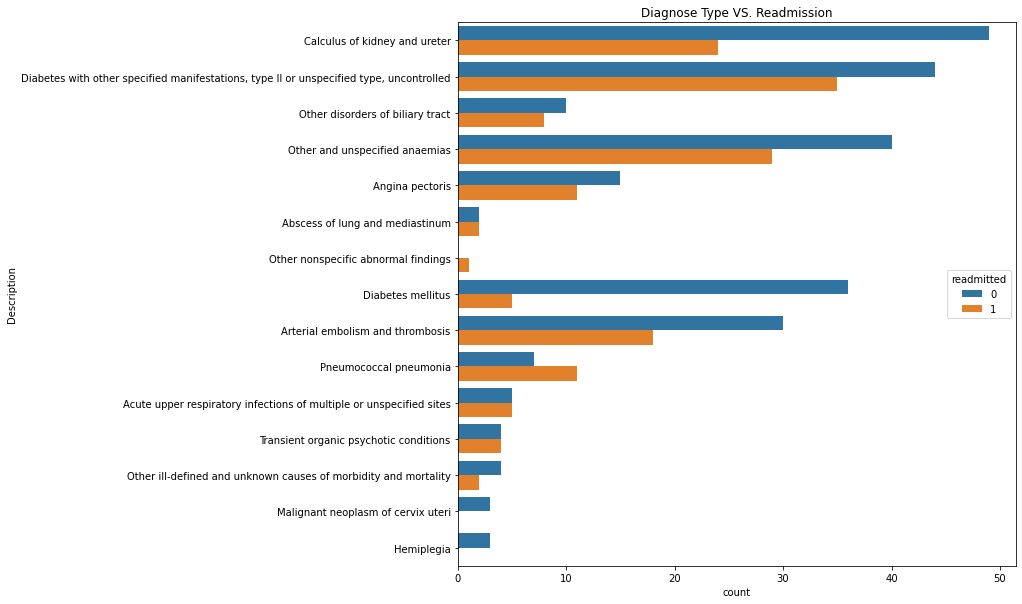

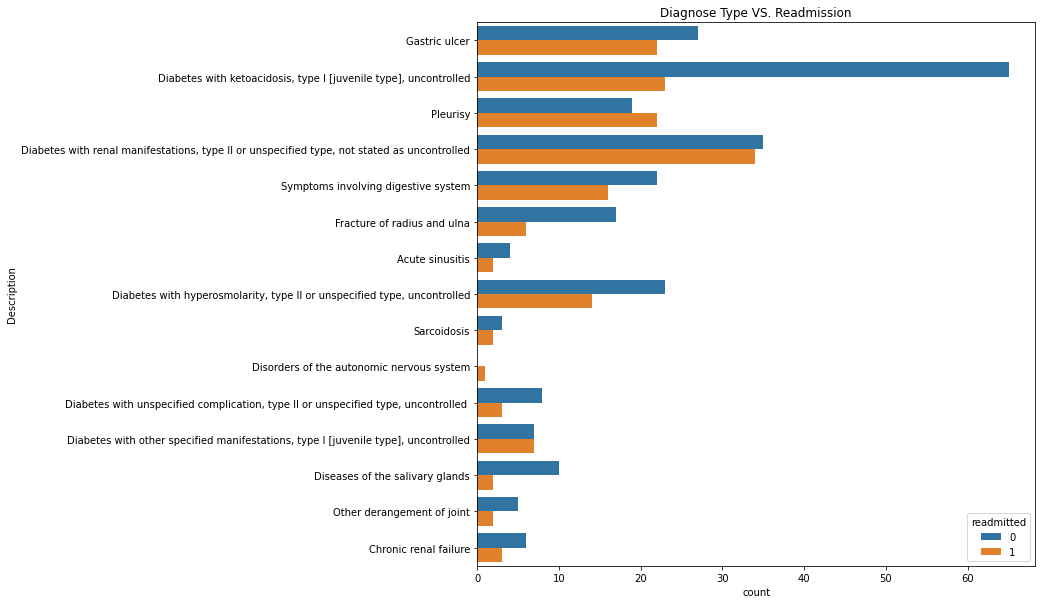

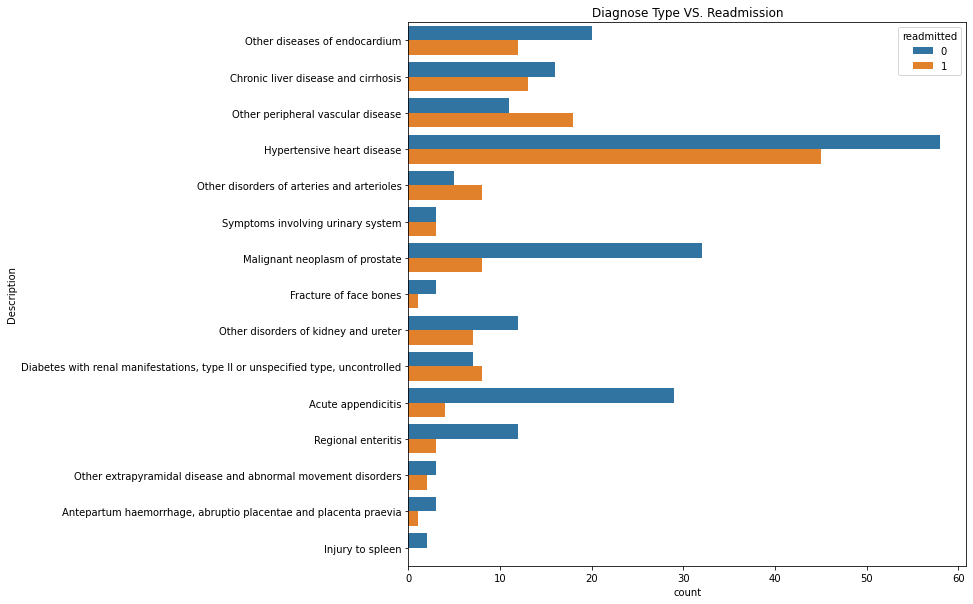

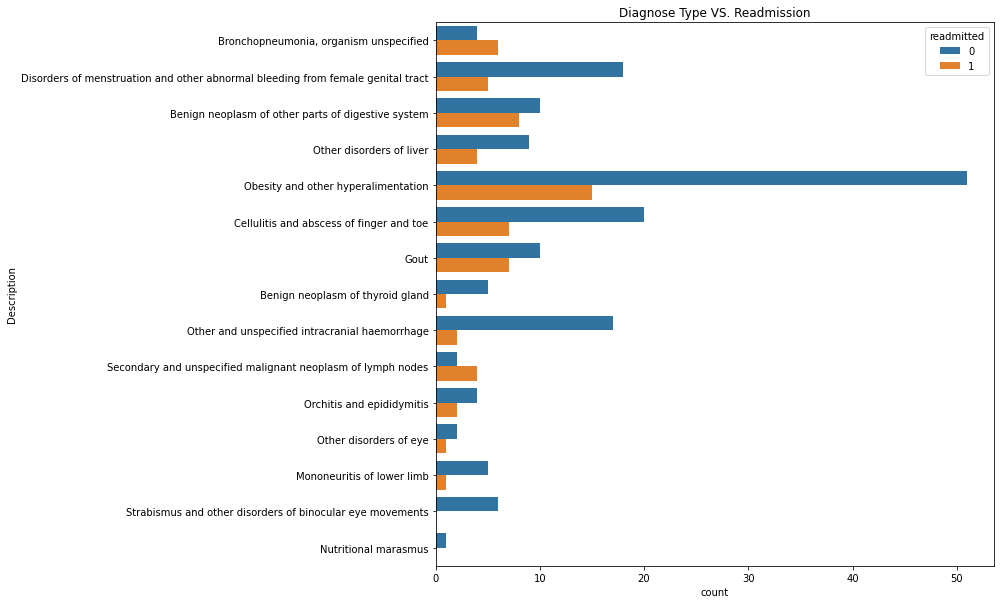

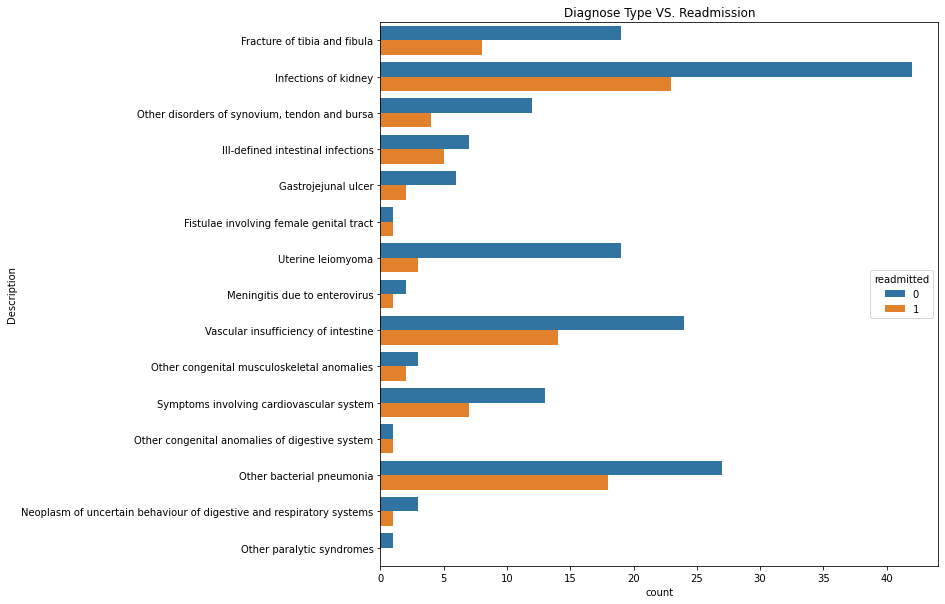

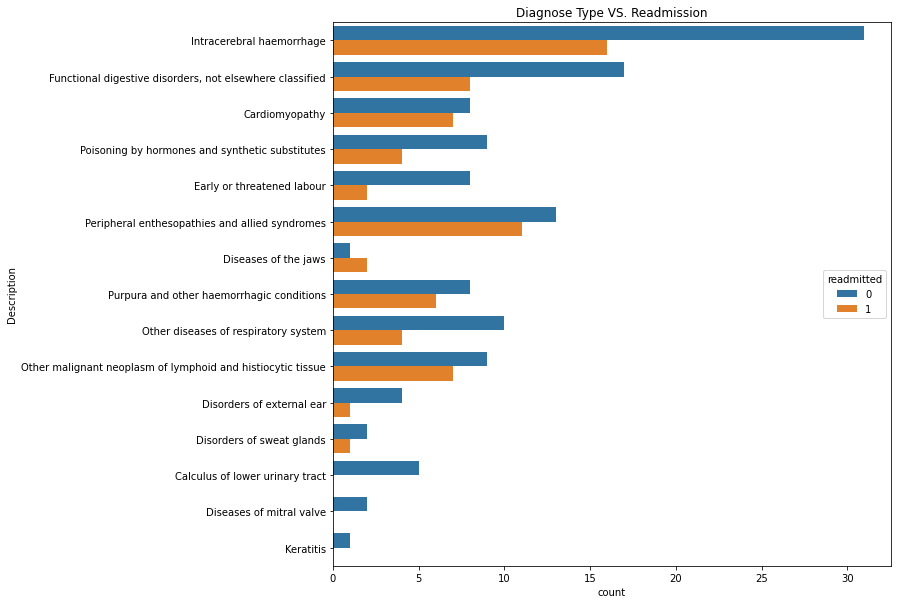

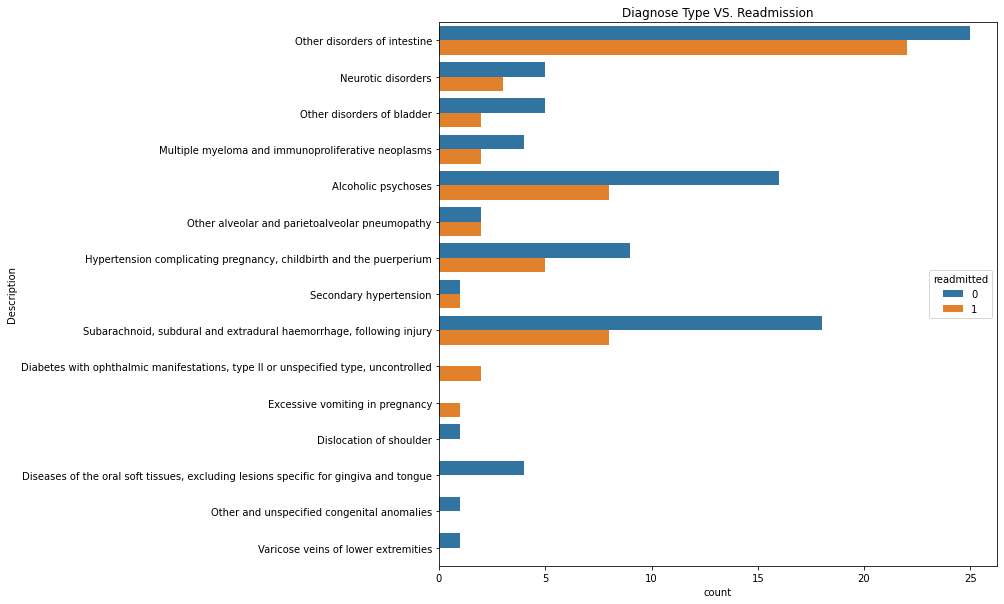

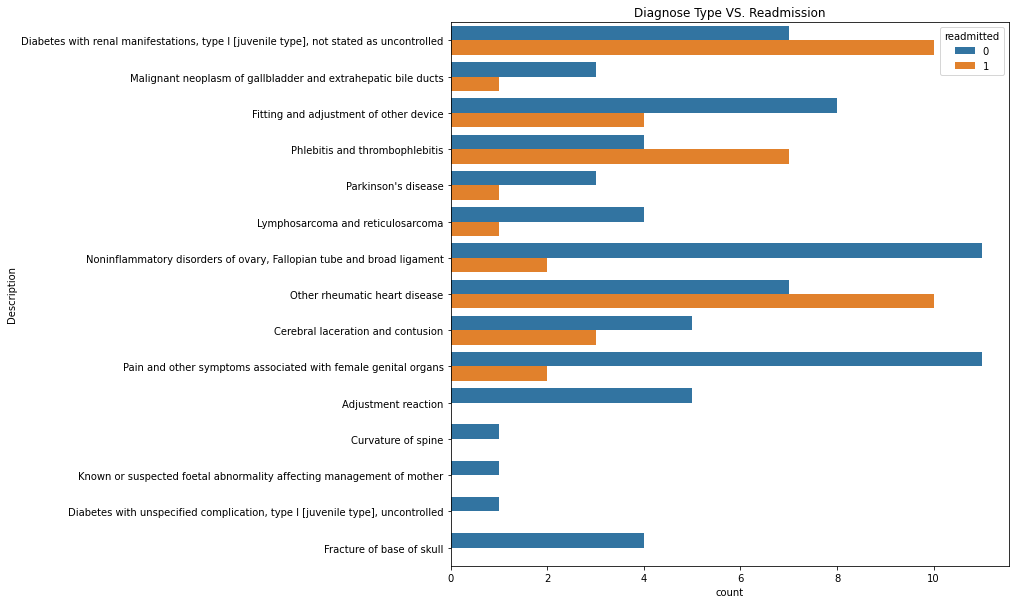

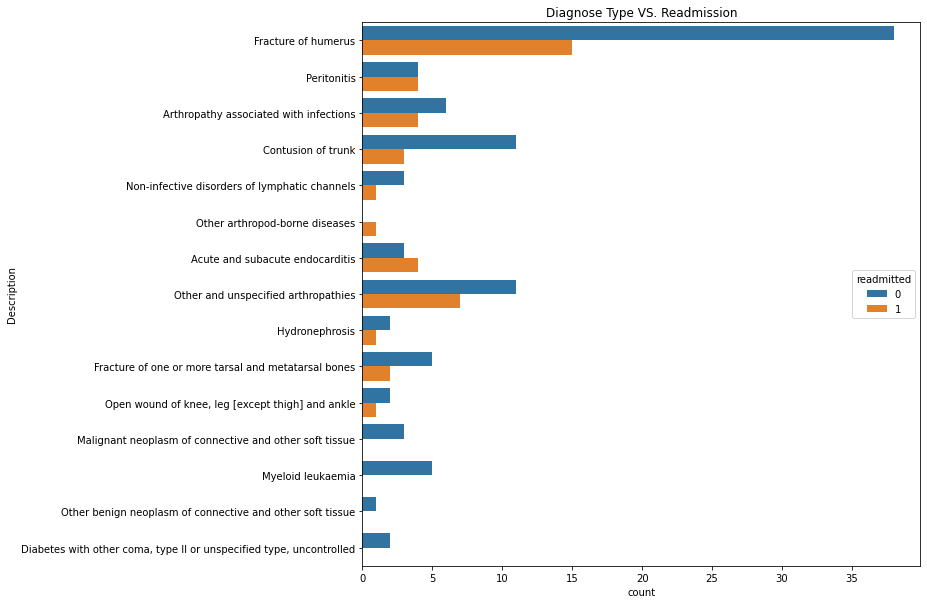

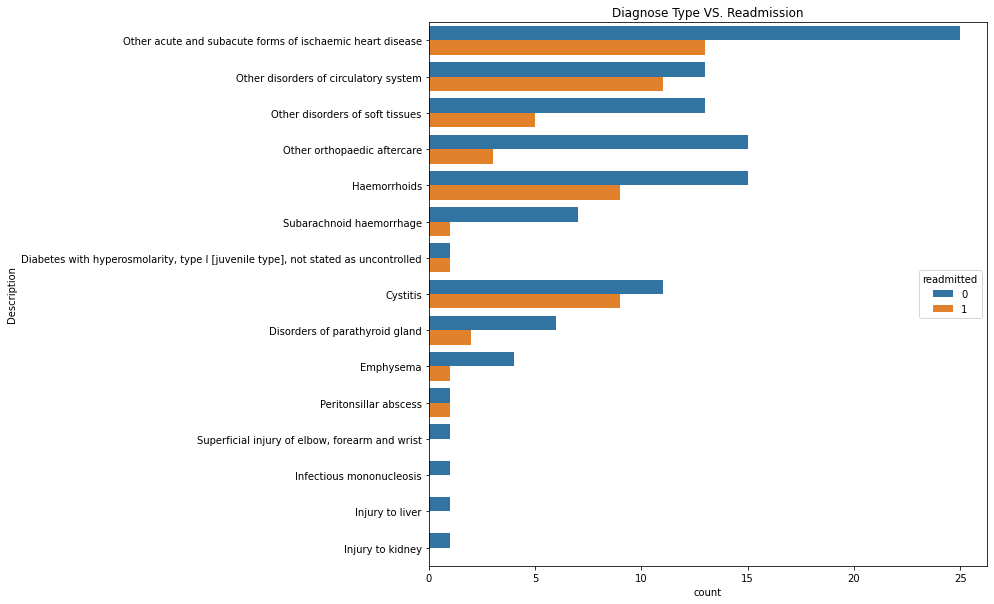

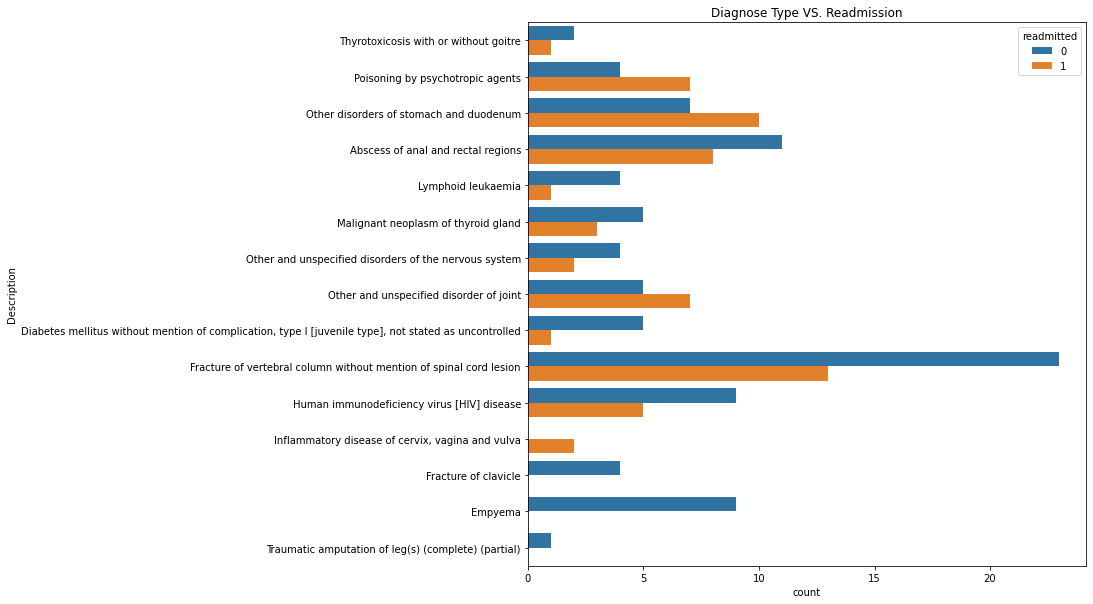

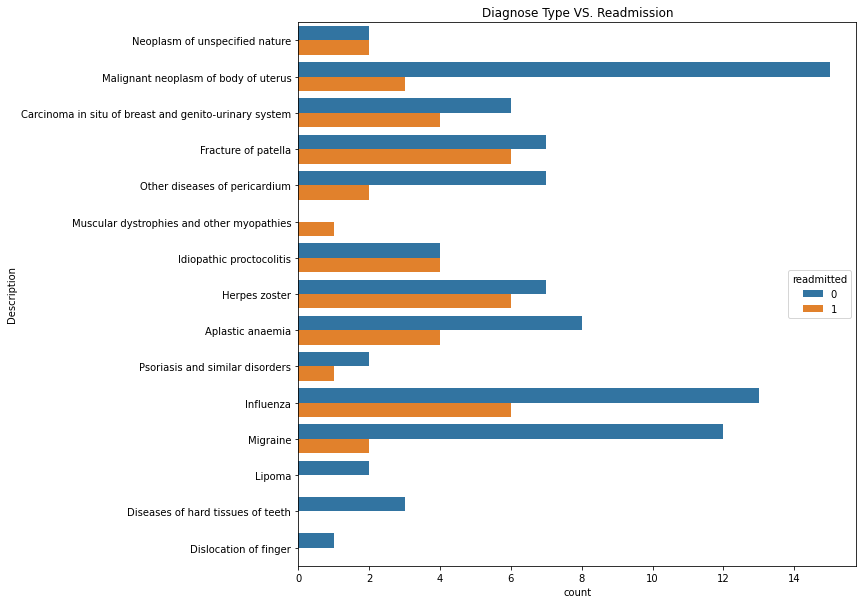

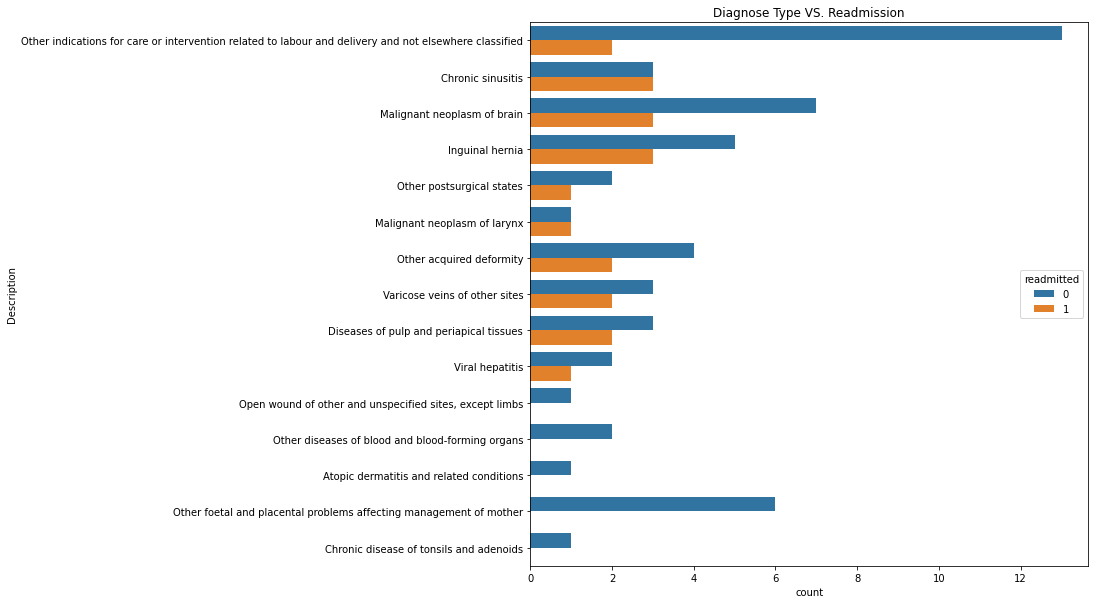

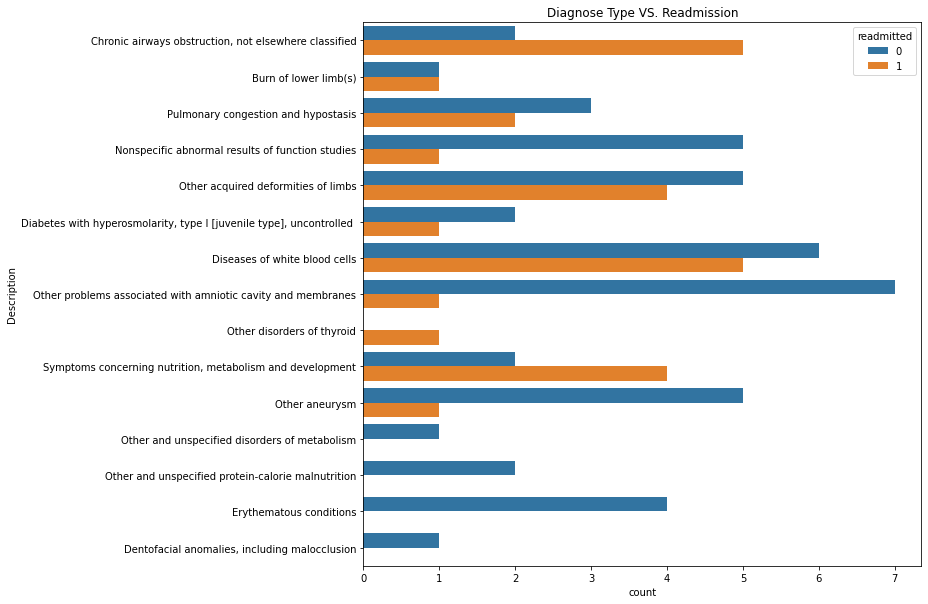

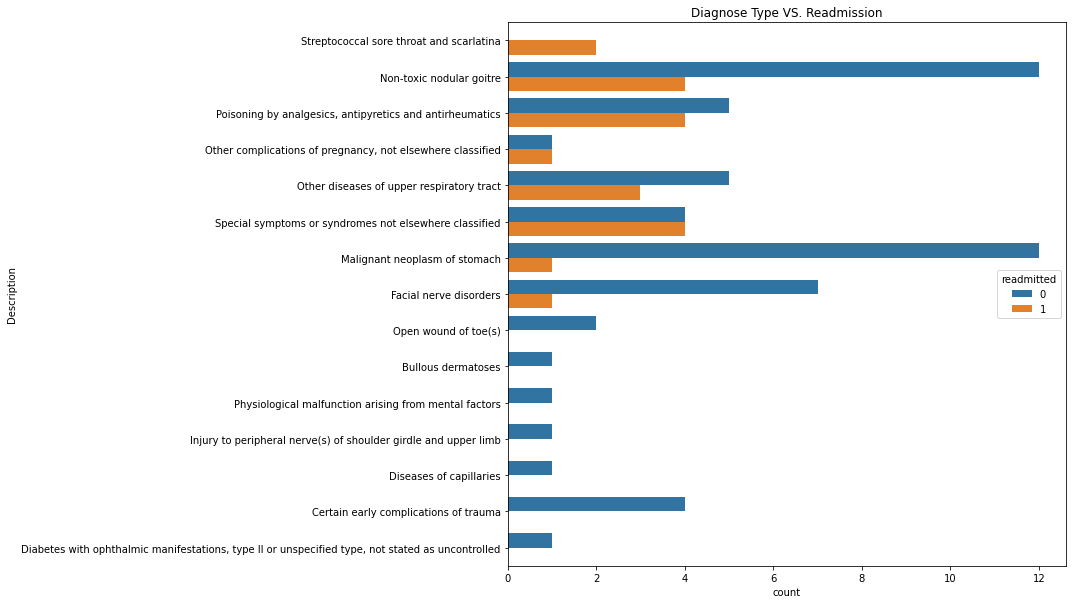

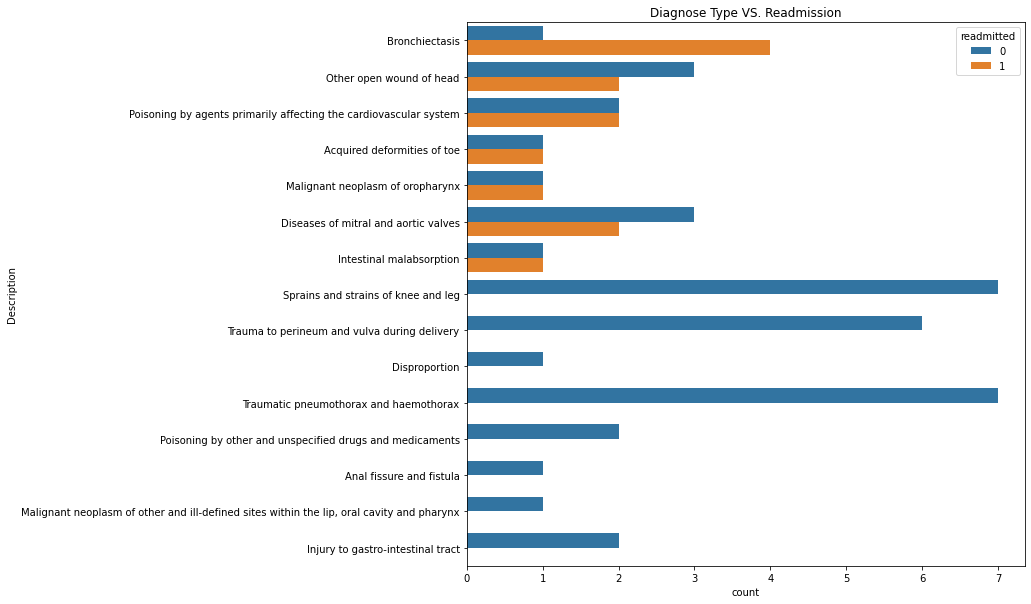

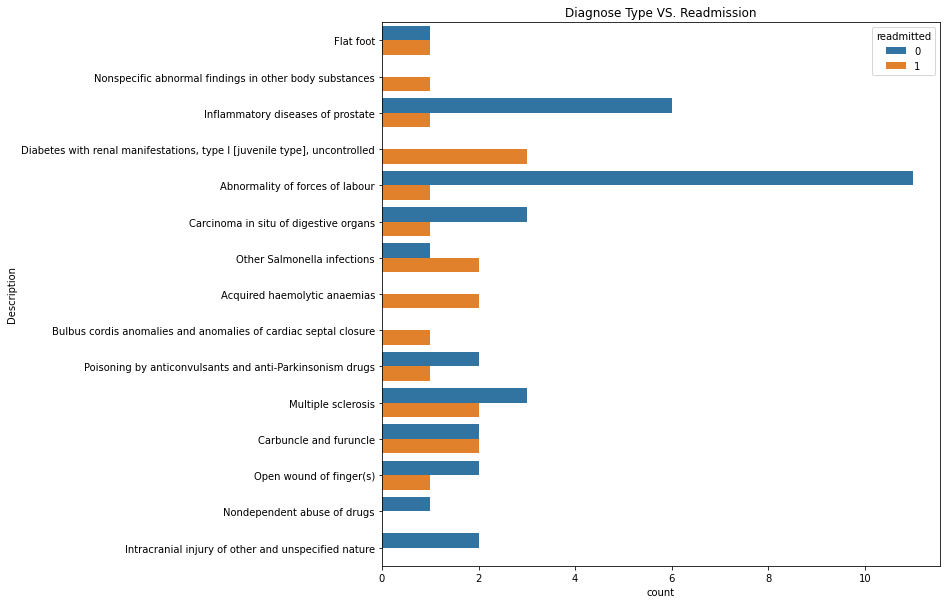

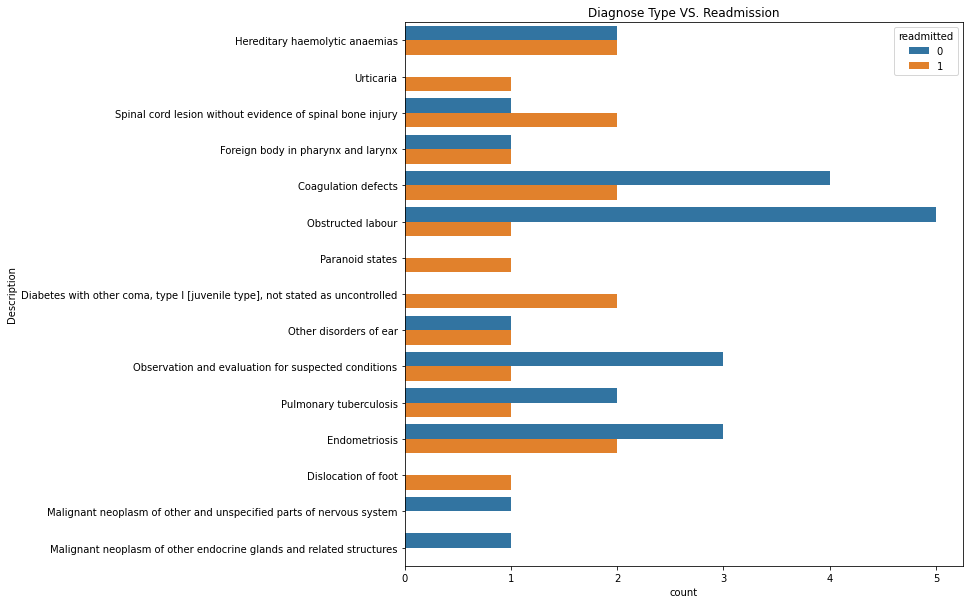

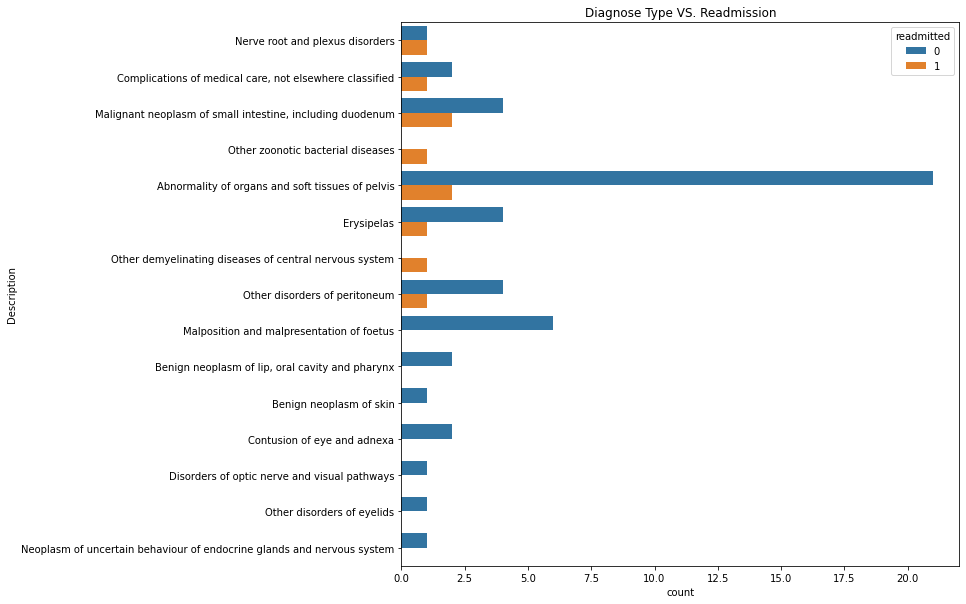

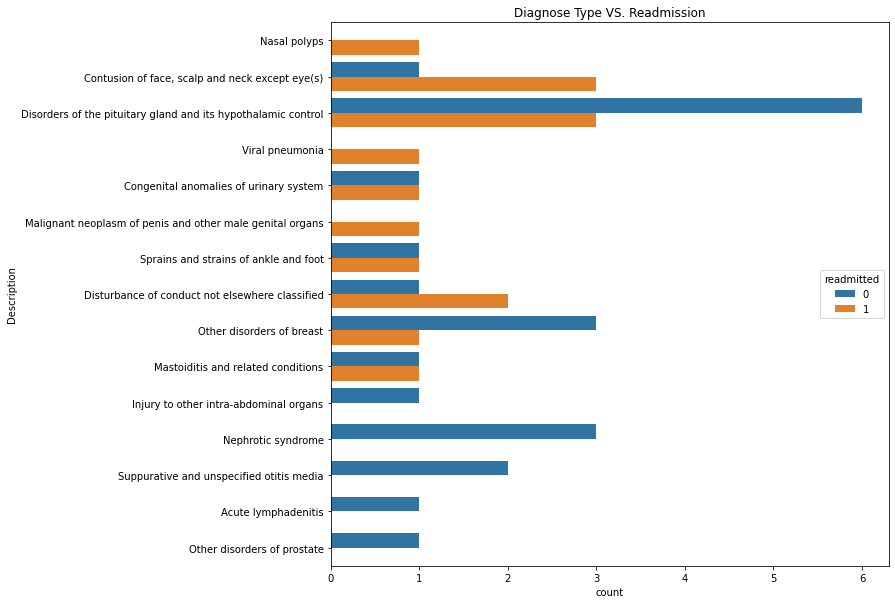

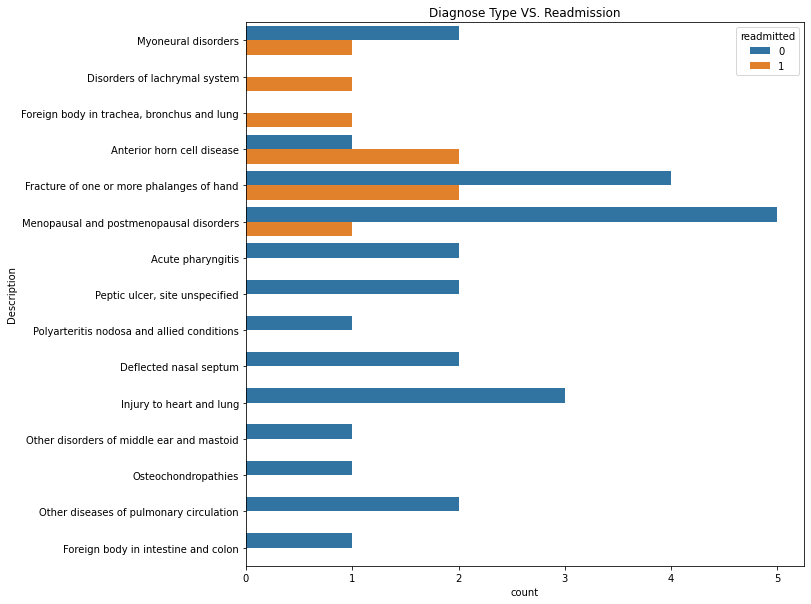

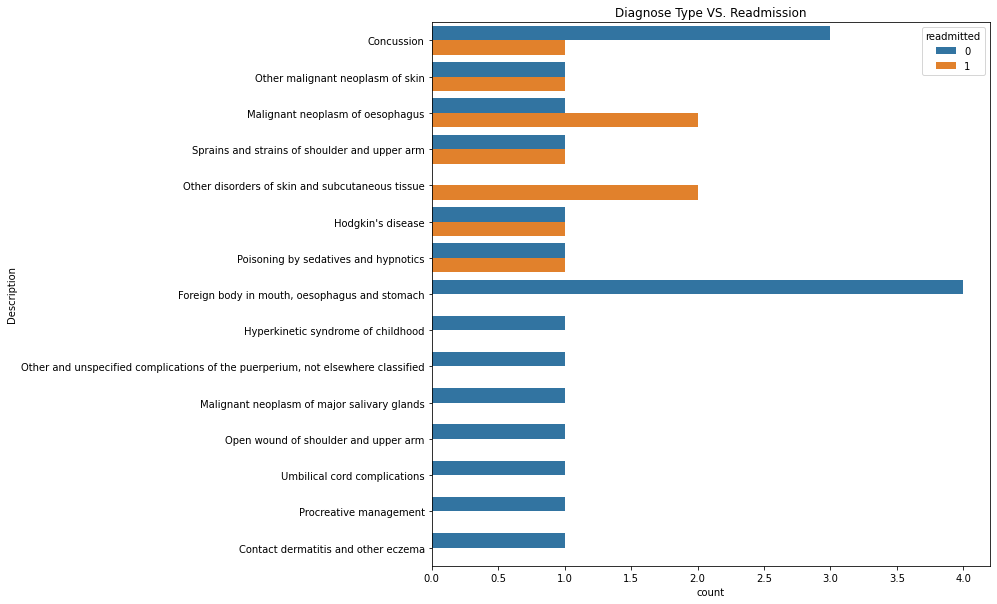

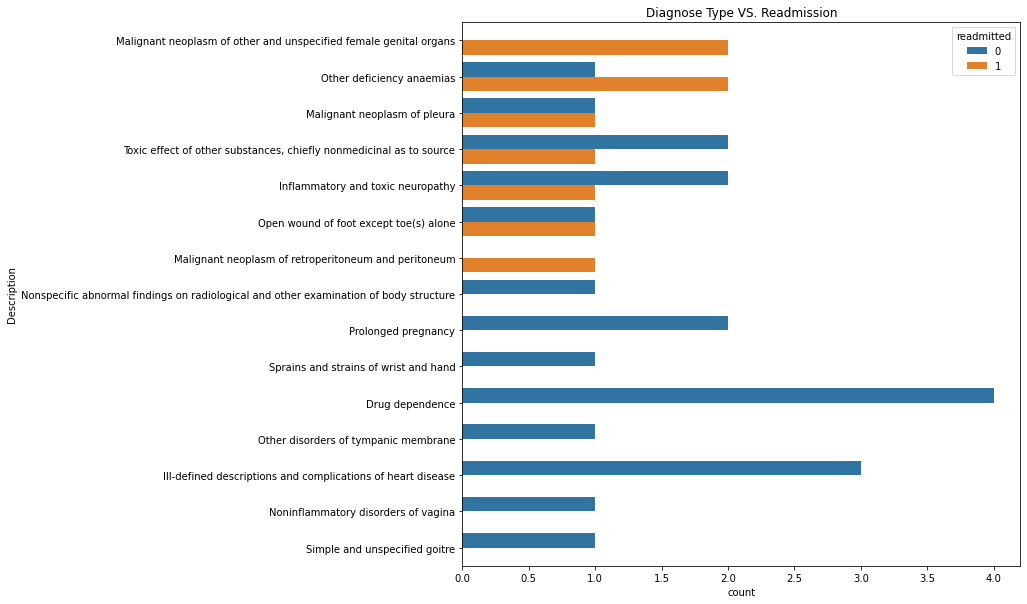

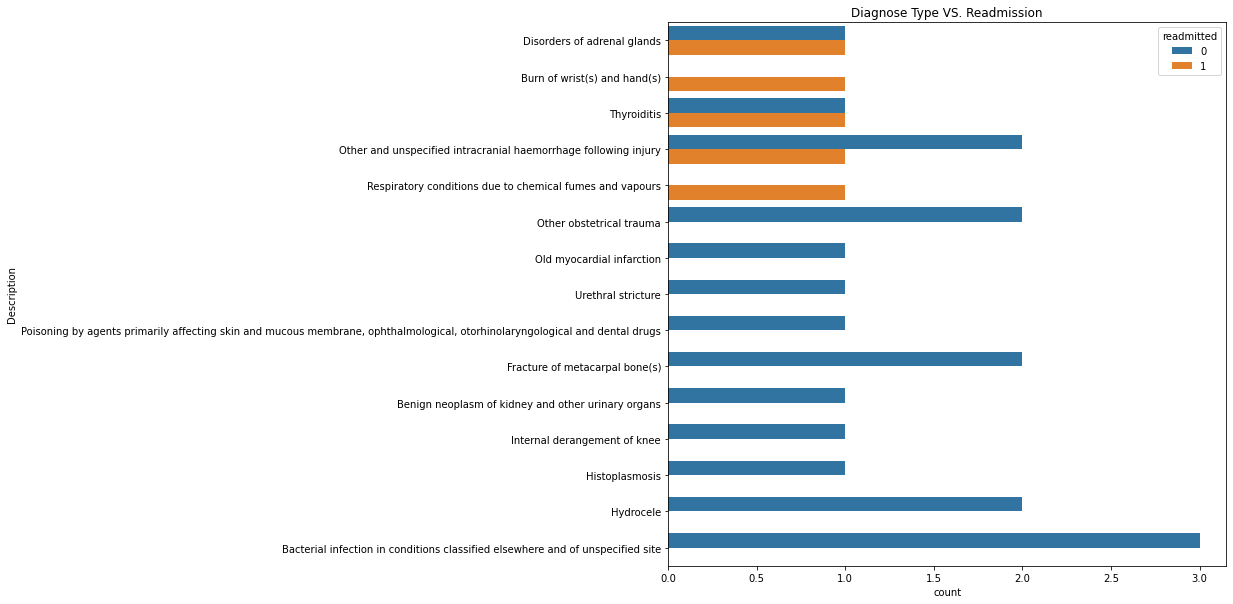

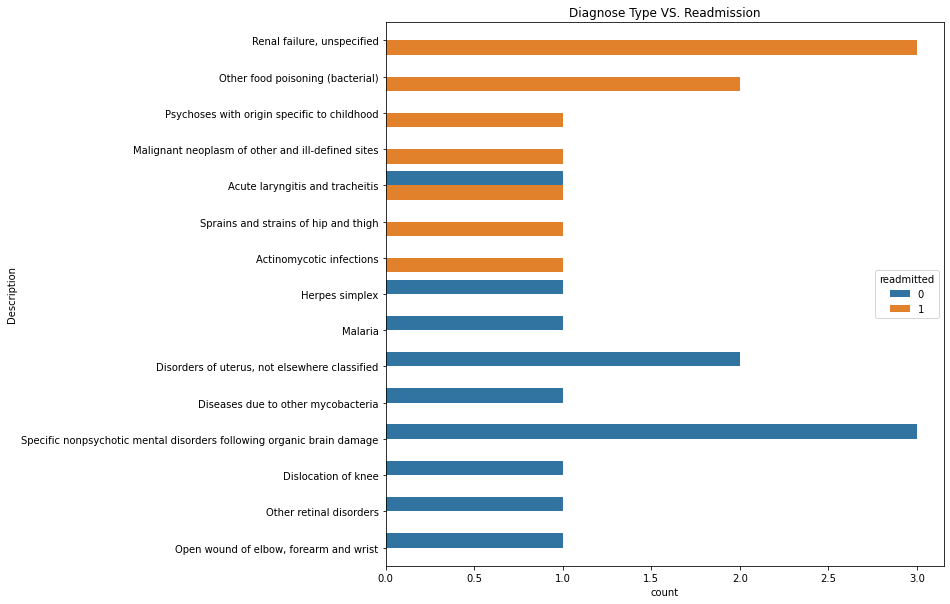

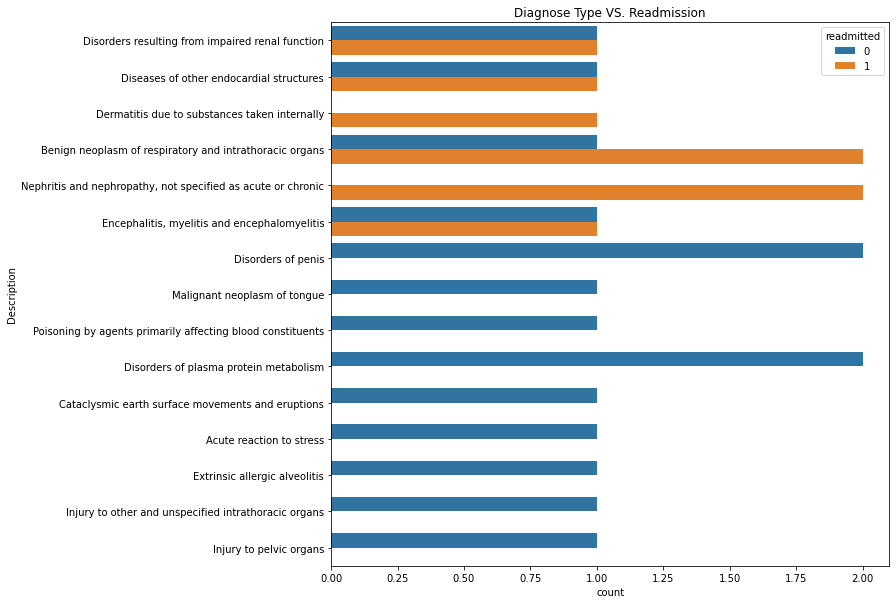

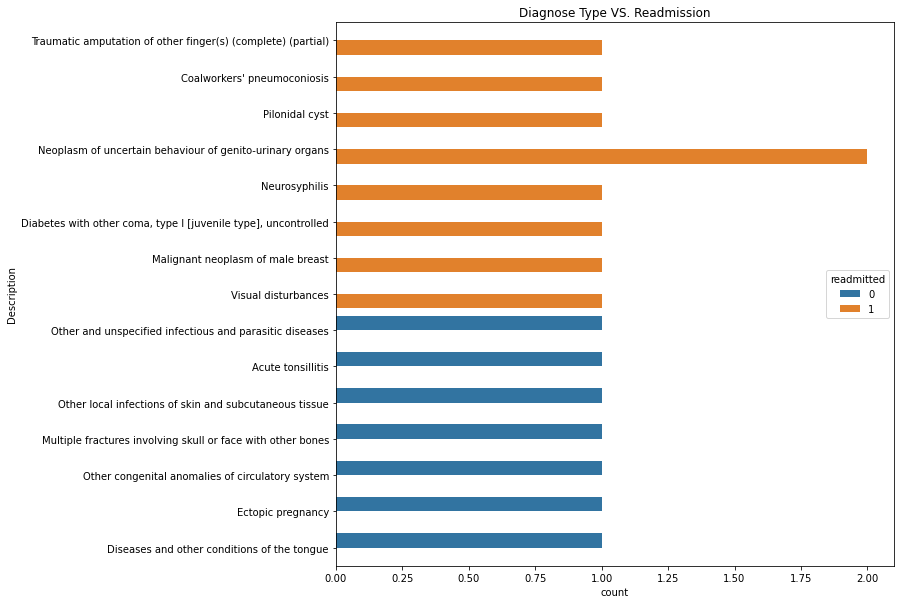

In [196]:
# Diagnose Type impact on readmission rates
df_merge = df_10.merge(icdCodes,how="inner",left_on="diag_1",right_on="ICD_Code")
all_diagnose_types = df_merge["Description"].unique()

prev=0
for i in range(15,len(all_diagnose_types),15):
    fig = plt.figure(figsize=(10,10))
    df_temp = df_merge[df_merge["Description"].apply(lambda x: x in all_diagnose_types[prev:i])]
    df_temp = df_temp.sort_values(by=['readmitted'], ascending=False)
    prev = i
    sns.countplot(y= df_temp['Description'], hue = df_temp['readmitted']).set_title('Diagnose Type VS. Readmission')


In [197]:
#Diagnosis Type impact on readmissions
prev = 0
df_merge_1 = df_10.merge(icdCodes,how="inner",left_on="diag_1",right_on="ICD_Code")
all_diagnose_types_1 = df_merge["Description"].unique()
df_temp = df_merge[df_merge["Description"].apply(lambda x: x in all_diagnose_types[prev:i])]
df_temp = df_temp.sort_values(by=['readmitted'], ascending=False)

count1 = df_temp[df_temp['readmitted'] == 1] #All readmitted
count0 = df_temp[df_temp['readmitted'] == 0] #All NOT readmitted
total = df_temp.groupby('Description')['readmitted'].count().reset_index() #Total readmitted

count1_race = count1.groupby('Description')['readmitted'].count().reset_index()
count0_race = count0.groupby('Description')['readmitted'].count().reset_index()

total['Has been Readmitted (%)'] = round((count1_race['readmitted'] / total['readmitted']) *100, 2)
total['Has not been Readmitted (%)'] = round((count0_race['readmitted'] / total['readmitted']) *100, 2)
total.drop('readmitted', axis=1, inplace=True)
total.dropna()
total.sort_values(by = ['Description'], ascending=True)
#total.isnull().sum()

,Description,Has been Readmitted (%),Has not been Readmitted (%)
0,Abnormality of forces of labour,8.33,91.67
1,Abnormality of organs and soft tissues of pelvis,8.70,91.30
2,Abscess of anal and rectal regions,42.11,57.89
3,Abscess of lung and mediastinum,50.00,50.00
4,Acquired deformities of toe,50.00,50.00
...,...,...,...
535,Vertiginous syndromes and other disorders of v...,NaN,NaN
536,Viral and chlamydial infection in conditions c...,NaN,NaN
537,Viral hepatitis,NaN,NaN
538,Viral pneumonia,NaN,NaN


**1.3: Model building**

In [198]:
# Model that predicts whether a diabetic patient will be readmitted or not
subset_col = ['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital', 'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'readmitted']
df_11 = df_10[subset_col]


In [199]:
# split features and target column
X = df_11.drop("readmitted",axis=1)
y = df_11["readmitted"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [200]:
# train LogisticRegression model
lr = LogisticRegression()
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)

Text(33.0, 0.5, 'Actual Values')

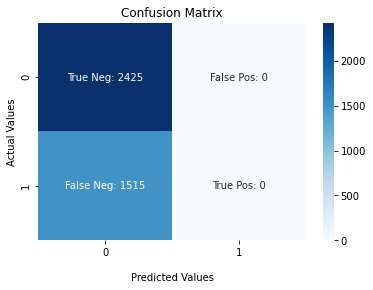

In [201]:
# plot confusion matrix
cm = confusion_matrix(y_test,predictions)
labels = labels = np.asarray([f'True Neg: {cm[0,0]}',f'False Pos: {cm[0,1]}',f'False Neg: {cm[1,0]}',f'True Pos: {cm[1,1]}']).reshape(2,2)
ax = sns.heatmap(cm, annot = labels, fmt = "", cmap = "Blues")

ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

In [202]:
# cross validation evaluation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.2f' % (np.mean(scores)))

Accuracy: 0.63


In [203]:
# classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2425
           1       0.00      0.00      0.00      1515

    accuracy                           0.62      3940
   macro avg       0.31      0.50      0.38      3940
weighted avg       0.38      0.62      0.47      3940



C:\Users\sufya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2.1: Improved model**

In [204]:
# split both 0 and 1 classes data
count1 = df_11[df_11['readmitted'] == 1] #All readmitted
count0 = df_11[df_11['readmitted'] == 0] #All NOT readmitted

print(f"Class 1 Count: {count1.shape[0]}")
print(f"Class 0 Count: {count0.shape[0]}")

Class 1 Count: 7375
Class 0 Count: 12321


In [205]:
count1_over = count1.sample(count0.shape[0],replace=True)
df_12 = pd.concat([count0, count1_over], axis=0)

In [206]:
# split features and target column
X = df_12.drop("readmitted",axis=1)
y = df_12["readmitted"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [207]:
pipe = Pipeline([("scaler",StandardScaler()),("clf",RandomForestClassifier())])
pipe.fit(X_train,y_train)

predictions_improved = pipe.predict(X_test)

Text(33.0, 0.5, 'Actual Values')

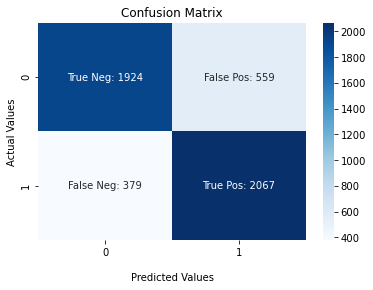

In [208]:
# plot confusion matrix
cm_improved = confusion_matrix(y_test,predictions_improved)

labels = np.asarray([f'True Neg: {cm_improved[0,0]}',f'False Pos: {cm_improved[0,1]}',f'False Neg: {cm_improved[1,0]}',f'True Pos: {cm_improved[1,1]}']).reshape(2,2)
ax = sns.heatmap(cm_improved, annot = labels, fmt = "", cmap = "Blues")

ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

In [209]:
# classification report of improved model
print(classification_report(y_test,predictions_improved))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2483
           1       0.79      0.85      0.82      2446

    accuracy                           0.81      4929
   macro avg       0.81      0.81      0.81      4929
weighted avg       0.81      0.81      0.81      4929



In [210]:
# cross validation evaluation of improved model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = Pipeline([("scaler",StandardScaler()),("clf",RandomForestClassifier())])
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.2f' % (np.mean(scores)))

Accuracy: 0.83


**2.2: K-Means clustering**

In [211]:
pca = PCA(2)
df_pca = pd.DataFrame(pca.fit_transform(X),columns = ["feature_1","feature_2"])
km = KMeans(3)
km.fit(df_pca)

KMeans(n_clusters=3)

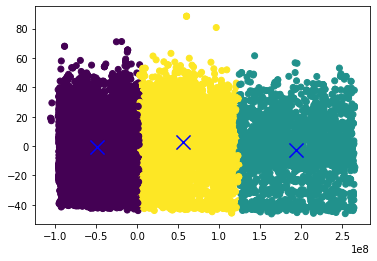

In [212]:
# Plotting cluster of train data
centers = km.cluster_centers_

plt.scatter(df_pca["feature_1"],df_pca["feature_2"],c=km.predict(df_pca))
plt.scatter(centers[:,0], centers[:,1], marker='x', s=200, c='b')